<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Coleta de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Web Crawling;</li>
  <li>Web Scraping;</li>
  <li>Web API.</li>
</ol>

---

# **Exercícios**

## 1\. Filmes populares do IMDB

O [IMDB](https://www.imdb.com/) é um famoso site de `reviews` de filmes e seriados. Uma das páginas mais acessadas do website é o ranking de filmes mais bem votados. Neste exercício, vamos extrair informações deste website:

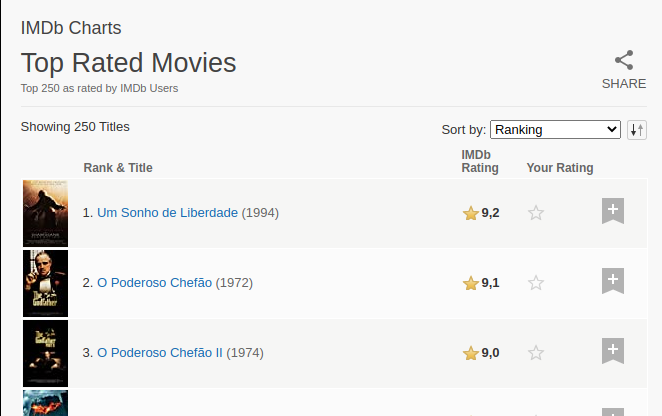

### **1.1. Arquivo Robots.txt**

Utilize o pacote Python `requests` para fazer o download do conteúdo do arquivo `robots.txt` do site do IMDB e salve numa variável chamada `robots`, este é o link:

```
https://www.imdb.com/robots.txt
```

Com o conteúdo na variável `robots`, verifique se a palavra `top` ou `charts` está presente no conteúdo do texto. Se sim, imprima `True`, senão imprima `False`.

In [4]:
import requests
from requests.exceptions import HTTPError

robots = None
URL = 'https://www.imdb.com/robots.txt'

try:
  resposta = requests.get(URL)
  resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  robots = resposta.text

print(robots)

# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /list/ls*/export
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft
Disallow: /name/nm*/fil

**Dica**: Você pode colar o endereço do arquivo robots.txt no seu navegador para visualizar o conteúdo do arquivo.

### **1.2. Crawling & Scraping**

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 filmes mais populares do IMDB (titulo, ano e nota), este é o link:

```
https://www.imdb.com/chart/top/
```

Escreva os dados extraídos no arquivo csv `imdb.csv` separado por `;` no seguinte formato:

```
ranking;titulo;ano;nota
1;The Shawshank Redemption;1994;9.2
2;The Godfather;1972;9.1
3;The Godfather: Part II;1974;9.0
```

In [5]:
# a) Utilize o pacote requests para fazer o download da página na variável conteudo

import requests
from requests.exceptions import HTTPError

conteudo = None
URL = 'https://www.imdb.com/chart/top/'


headers =  {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36',
            'Accept-Language': 'pt-BR,pt;q=0.5',
          }

def crawl_website(url: str, headers:dict) -> str:
    try:
        resposta = requests.get(url, headers=headers)
        resposta.raise_for_status()
    except HTTPError as exc:
        print(f'HTTP Error Occurred: {exc}')
    else:
        return resposta.text

conteudo = crawl_website(url=URL, headers = headers)
print(conteudo)

if conteudo is not None:
    print("Conteudo da pagina baixado com sucesso!")
else:
    print("Falha ao baixar o conteudo da pagina.")


<!DOCTYPE html><html lang="pt-BR" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1698667984291);
        }
    })</script><title>Os 250 melhores filmes do IMDb</title><meta name="description" content="Conforme avaliado pelos eleitores regulares do IMDb." data-id="main"/><meta property="og:site_name" content="IMDb"/><meta property="og:title" content="Os 250 melhores filmes do IMDb"/><meta pro

In [6]:
# b) Utilize o pacote beautifulsoup4 para carregar o HTML da variavel conteudo na variavel pagina

from bs4 import BeautifulSoup

pagina = BeautifulSoup(conteudo, 'html.parser')

if pagina is not None:
    print("HTML carregada!")
else:
    print("Falha na HTML")

HTML carregada!


In [29]:
conteudo_extraido = []

tabela = pagina.find('div', {'data-testid': 'chart-layout-main-column'})
movies = tabela.find("ul")

for index, coluna in enumerate(movies.find_all('li')):
    if index >= 10:
        break
    movie = coluna.get_text(";").strip().split(";")
    conteudo_extraido.append(movie)

In [30]:
print(conteudo_extraido)

[['1. Um Sonho de Liberdade', '1994', '2h 22m', '16', '9,3', '\xa0(', '2,8\xa0mi', ')', 'Avaliar'], ['2. O Poderoso Chefão', '1972', '2h 55m', '14', '9,2', '\xa0(', '2\xa0mi', ')', 'Avaliar'], ['3. Batman - O Cavaleiro das Trevas', '2008', '2h 32m', '12', '9,0', '\xa0(', '2,8\xa0mi', ')', 'Avaliar'], ['4. O Poderoso Chefão II', '1974', '3h 22m', '14', '9,0', '\xa0(', '1,3\xa0mi', ')', 'Avaliar'], ['5. 12 Homens e uma Sentença', '1957', '1h 36m', 'Livre', '9,0', '\xa0(', '838\xa0mil', ')', 'Avaliar'], ['6. A Lista de Schindler', '1993', '3h 15m', '14', '9,0', '\xa0(', '1,4\xa0mi', ')', 'Avaliar'], ['7. O Senhor dos Anéis: O Retorno do Rei', '2003', '3h 21m', '14', '9,0', '\xa0(', '1,9\xa0mi', ')', 'Avaliar'], ['8. Pulp Fiction - Tempo de Violência', '1994', '2h 34m', '18', '8,9', '\xa0(', '2,2\xa0mi', ')', 'Avaliar'], ['9. O Senhor dos Anéis: A Sociedade do Anel', '2001', '2h 58m', '12', '8,8', '\xa0(', '2\xa0mi', ')', 'Avaliar'], ['10. Três Homens em Conflito', '1966', '2h 41m', '14', 

**Dica**: O código na letra c já extrai o conteúdo das linhas na lista `textos_coluna`, basta que você extraia o conteúdo de interesse dela. Como exemplo:

```python
[]
['', '1.', '      The Shawshank Redemption', '(1994)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '2.', '      The Godfather', '(1972)', '9.1', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '3.', '      The Godfather: Part II', '(1974)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '4.', '      The Dark Knight', '(2008)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '5.', '      12 Angry Men', '(1957)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
```

In [31]:
# d) Escreva o arquivo imdb.csv com o conteudo da variavel conteudo_extraido

import csv

with open('imdb.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(conteudo_extraido)

print("Os dados dos 10 primeiros filmes foram escritos no arquivo imdb.csv")

Os dados dos 10 primeiros filmes foram escritos no arquivo imdb.csv


---

## 2\. Bônus: Projeto em destaque do GitHub

**Nota**: Este exercício não é obrigatório.

O [GitHub](https://github.com/) é o maior repositória de código aberto na internet. Nele, você pode encontrar o código fonte de diversos projetos, alguns inclusive utilizamos em nossas aulas, como o [Pandas](https://github.com/pandas-dev/pandas). O GitHub apresenta uma página de projetos em destaque, que são os projetos que estão recebendo muita atenção da comunidade:

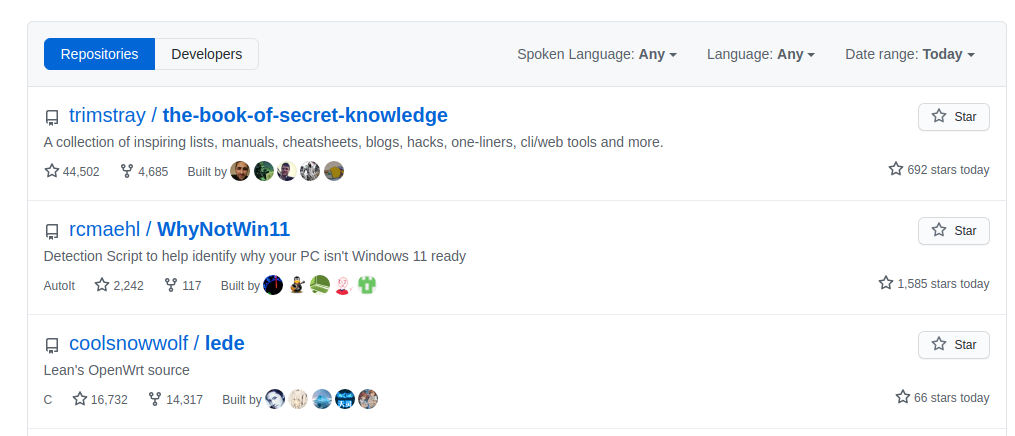

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 projetos mais populares do GitHub, este é o link:

```
https://github.com/trending
```

Escreva os dados extraídos no arquivo csv `github.csv` separado por `;` no seguinte formato:

```
ranking;project;language;stars;stars_today;forks
1;the-book-of-secret-knowledge;;44502;692;4685
2;whynotwin11;autoit;2242;1585;117
3;lede;c;16732;66;14317
```

**Nota**: Confira o arquivo `robots.txt` do website.